In [ ]:
!pip install keybert
from keybert import KeyBERT

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 3.3 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.4-py3-none-any.whl size=39199 sha256=1357f18edd7da71018b3c0a12b53bf6d31eaef8013147db1a65d8965c5b2d78d
  Stored in directory: /root/.cache/pip/wheels/97/ef/4c/6588bd7072b0cc04225b40e639b991e49ebd4e21fb81f0acee
Successfully built keybert


In [ ]:
!pip install transformers

In [ ]:
doc1 = """
    My wheel was damaged by the fitter and you won't take responsibility for it after saying you would
"""

In [ ]:
#doc1 = input("Enter a text: ")       #for user input

In [ ]:
model = KeyBERT(model="distilbert-base-nli-mean-tokens")

In [ ]:
Keywords = model.extract_keywords(
    doc1,
    top_n=4,    #number of sub-theme/keywords
    keyphrase_ngram_range=(1, 2),  #number of keywords in one sub-theme
    stop_words="english",
)

In [ ]:
Keywords


[('wheel damaged', 0.5844),
 ('damaged fitter', 0.5611),
 ('damaged', 0.4481),
 ('wheel', 0.3025)]

In [ ]:

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
# Load tokenizer & model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = TFAutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment', from_pt=True)

sentiment_labels = []
sentiment_scores = []

# sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Iterate through each keyword
for keyword in Keywords:

    # prediction for each keyword
    result = classifier(keyword[0])

     # sentiment label & score
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']

    # sentiment label & score
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']
    # Map sentiment labels : Positive or Negative
    if sentiment_label in ["1 star", "2 stars", "3 stars"]:
        sentiment_label = "Negative"
    elif sentiment_label in ["4 stars", "5 stars"]:
        sentiment_label = "Positive"

    # Append sentiment information to lists
    sentiment_labels.append(sentiment_label)
    sentiment_scores.append(sentiment_score)

    # Print or process the sentiment information as needed
    print(f"Keyword: {keyword}, Sentiment: {sentiment_label}")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Keyword: ('wheel damaged', 0.5844), Sentiment: Negative
Keyword: ('damaged fitter', 0.5611), Sentiment: Negative
Keyword: ('damaged', 0.4481), Sentiment: Negative
Keyword: ('wheel', 0.3025), Sentiment: Positive


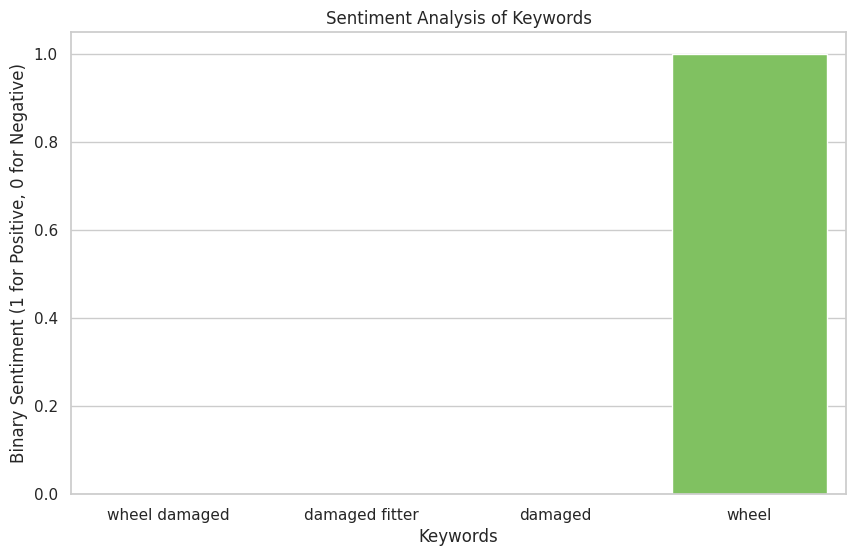

In [ ]:
# for analysis & visualization
import matplotlib.pyplot as plt
import seaborn as sns

keywords_list = [keyword[0] for keyword in Keywords]

# Map sentiment scores : 1 (Positive) or 0 (Negative)
binary_sentiment = [1 if label == "Positive" else 0 for label in sentiment_labels]

# Plotting with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# bar plot
sns.barplot(x=keywords_list, y=binary_sentiment, palette="viridis")

plt.title("Sentiment Analysis of Keywords")
plt.xlabel("Keywords")
plt.ylabel("Binary Sentiment (1 for Positive, 0 for Negative)")

plt.show()


In [ ]:
#Implemented BERT model, which is very quick & can be executed on CPU alone.
#Most importantly it is fulfilling our main objectives.

#To have more well defined results, we can also use LLMs, but for that we will need GPU.